In [71]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)


import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [72]:
train_dataset = pd.read_csv("./Data/A_Z Handwritten Data.csv")
num_train_dataset = train_dataset.shape[0]

In [73]:
print(f"Number of training data: {num_train_dataset}")
train_dataset.head()

Number of training data: 372450


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
train_dataset.rename(columns={'0':'label'}, inplace=True)

In [75]:
train_dataset = train_dataset.sample(n=5000, random_state=42).sort_values(by='label').reset_index(drop=True)

In [76]:
train_dataset['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [77]:
train_dataset

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
train_y = train_dataset['label'].astype('float32')
train_x = train_dataset.drop(['label'],axis = 1).astype('int32')
train_x.shape, train_y.shape

((5000, 784), (5000,))

In [79]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

hiển thị ảnh đầu tiên

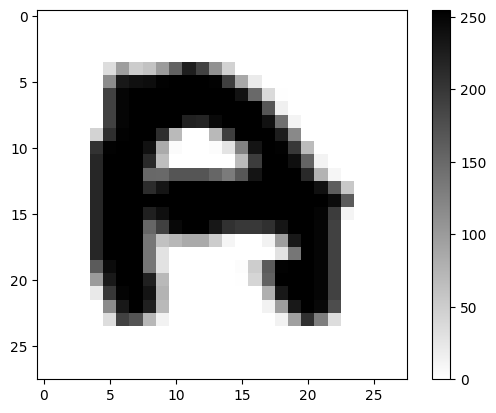

In [80]:
image = train_x.loc[0]
image = image.to_numpy().reshape(28, 28)

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

hiển thị 25 ảnh đầu

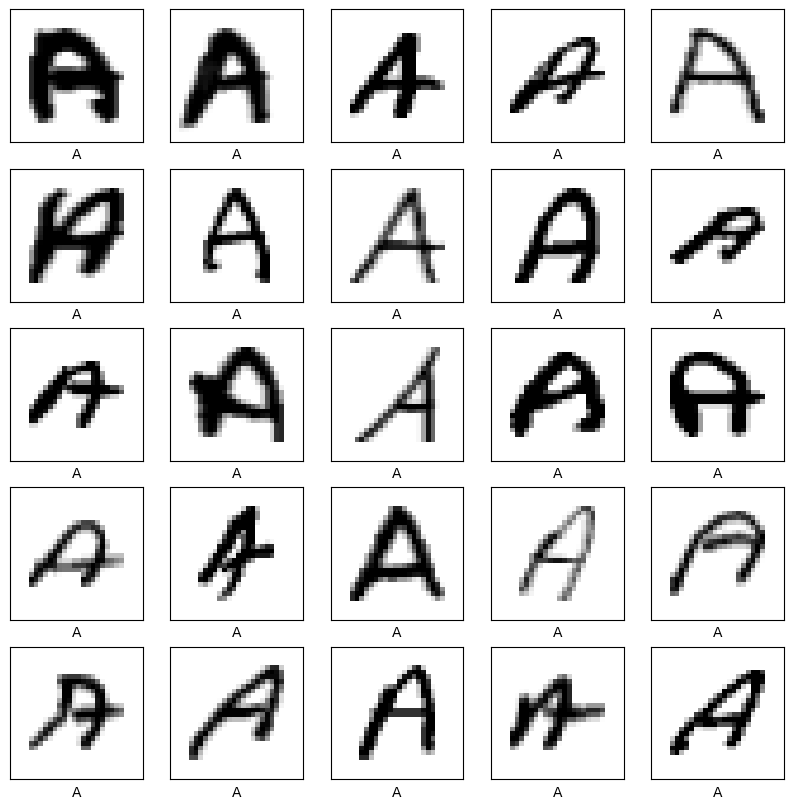

In [81]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(25):
    image = train_x.loc[i].to_numpy().reshape(28, 28)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(encode[int(train_y[i])])
plt.show()

tham số model

In [82]:
TEST_SIZE = 0.2 

BATCH_SIZE = 50
IMG_SHAPE  = 28 
EPOCHS     = 10

chuẩn bị dữ liệu

In [83]:
print(type(train_x))

<class 'pandas.core.frame.DataFrame'>


In [84]:
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=TEST_SIZE)
val_x,test_x,val_y,test_y = train_test_split(val_x,val_y,test_size=TEST_SIZE)

In [85]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0

val_x = val_x.values.reshape(-1,28,28,1)
val_x = val_x / 255.0

test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0

train_x.shape, val_x.shape, test_x.shape

((4000, 28, 28, 1), (800, 28, 28, 1), (200, 28, 28, 1))

one-hot encoding

In [86]:
train_y = tf.keras.utils.to_categorical(train_y,26)
val_y = tf.keras.utils.to_categorical(val_y,26)
test_y = tf.keras.utils.to_categorical(test_y,26)

train_y.shape, val_y.shape, test_y.shape

((4000, 26), (800, 26), (200, 26))

In [87]:
print(train_y[0:5,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]]


# Data augmentation

thêm dữ liệu cho train

In [88]:
train_x.shape

(4000, 28, 28, 1)

In [89]:
type(train_x)

numpy.ndarray

In [90]:
image_gen_train = ImageDataGenerator(
        rotation_range=30,  
        zoom_range = 0.2, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 

image_gen_train.fit(train_x)

In [91]:
train_data_gen=image_gen_train.flow(train_x,train_y, batch_size=BATCH_SIZE)

In [92]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

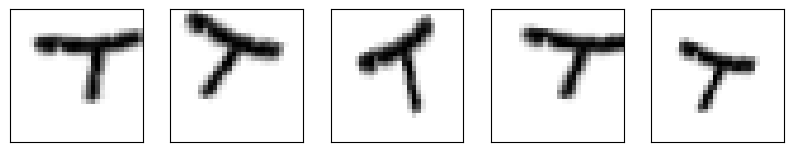

In [93]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(5):
    image = augmented_images[i].reshape(28, 28) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

thêm dữ liệu cho validation

In [94]:
image_gen_val = ImageDataGenerator(
        horizontal_flip=False,  # not randomly flip images
        vertical_flip=False)  # not randomly flip images

image_gen_train.fit(val_x)

In [95]:
val_data_gen=image_gen_val.flow(val_x,val_y, batch_size=BATCH_SIZE)

# model

In [96]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            global EPOCHS_COUNT
            EPOCHS_COUNT = epoch + 1
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

# model basic

In [97]:
model1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)

model1.summary()

c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,391,706 (5.31 MB)

 Trainable params: 1,391,706 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(name="Adam")
model1.compile(
    optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [99]:
EPOCHS_COUNT = 0
history1 = model1.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10


c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.2875 - loss: 2.5292 - val_accuracy: 0.6800 - val_loss: 1.1935
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5102 - loss: 1.7295 - val_accuracy: 0.7975 - val_loss: 0.7824
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6319 - loss: 1.2705 - val_accuracy: 0.8325 - val_loss: 0.5845
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7050 - loss: 1.0156 - val_accuracy: 0.8813 - val_loss: 0.4551
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7606 - loss: 0.8835 - val_accuracy: 0.8650 - val_loss: 0.4189
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7800 - loss: 0.7576 - val_accuracy: 0.8963 - val_loss: 0.3470
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7986 - loss: 0.6847 - val_accuracy: 0.9225 - val_loss: 0.3172
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8113 - loss: 0.6514 - val_accuracy: 0.9112 - val_loss: 0.

# model thêm lớp Convolutional và MaxPooling

In [100]:
model2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,754 (2.52 MB)

 Trainable params: 661,754 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
Optimizer = tf.keras.optimizers.Adam(name="Adam")
model2.compile(
    optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [102]:
EPOCHS_COUNT = 0
history2 = model2.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.2527 - loss: 2.6103 - val_accuracy: 0.7800 - val_loss: 0.7343
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.6829 - loss: 1.0776 - val_accuracy: 0.8700 - val_loss: 0.4203
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.7727 - loss: 0.7696 - val_accuracy: 0.9187 - val_loss: 0.2622
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8243 - loss: 0.5536 - val_accuracy: 0.9250 - val_loss: 0.2095
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8591 - loss: 0.4555 - val_accuracy: 0.9525 - val_loss: 0.1730
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8892 - loss: 0.3679 - val_accuracy: 0.9500 - val_loss: 0.1549
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.8969 - loss: 0.3301 - val_accuracy: 0.9563 - val_loss: 0.1435
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9095 - loss: 0.3239 - val_accuracy: 0.9575 - 

# model Thêm Dropout để giảm overfitting

In [103]:
model3 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,754 (2.52 MB)

 Trainable params: 661,754 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
Optimizer = tf.keras.optimizers.Adam(name="Adam")
model3.compile(
    optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [105]:
EPOCHS_COUNT = 0
history3 = model3.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.2112 - loss: 2.7604 - val_accuracy: 0.6275 - val_loss: 1.2832
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.5446 - loss: 1.5723 - val_accuracy: 0.8325 - val_loss: 0.6045
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.6589 - loss: 1.1742 - val_accuracy: 0.8938 - val_loss: 0.3507
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7293 - loss: 0.8793 - val_accuracy: 0.9050 - val_loss: 0.3167
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7681 - loss: 0.7682 - val_accuracy: 0.9325 - val_loss: 0.2088
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.7997 - loss: 0.6595 - val_accuracy: 0.9463 - val_loss: 0.1777
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8279 - loss: 0.5943 - val_accuracy: 0.9538 - val_loss: 0.1464
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8490 - loss: 0.5077 - val_accuracy: 0.9500 - 

# model thêm các lớp Convolutional và MaxPooling

In [106]:
model4 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985,264 (7.57 MB)

 Trainable params: 661,754 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,323,510 (5.05 MB)

In [107]:
Optimizer = tf.keras.optimizers.Adam(name="Adam")
model4.compile(
    optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [108]:
EPOCHS_COUNT = 0
history4 = model4.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.1517 - loss: 2.9572 - val_accuracy: 0.3675 - val_loss: 2.1790
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.3590 - loss: 2.2546 - val_accuracy: 0.7050 - val_loss: 1.0674
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5687 - loss: 1.4807 - val_accuracy: 0.8200 - val_loss: 0.6221
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.6714 - loss: 1.1059 - val_accuracy: 0.8675 - val_loss: 0.4137
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.7339 - loss: 0.8916 - val_accuracy: 0.9013 - val_loss: 0.3069
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7666 - loss: 0.8067 - val_accuracy: 0.9112 - val_loss: 0.2462
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8057 - loss: 0.6444 - val_accuracy: 0.9150 - val_loss: 0.2530
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.8120 - loss: 0.6014 - val_accuracy: 0.9375 - 

model thêm BatchNormalization để cải thiện hội tụ, giảm dropout để giảm mất mát

In [124]:
model5 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Dense(26, activation="softmax"),
    ]
)
model5.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 360,186 (1.37 MB)

 Trainable params: 359,610 (1.37 MB)

 Non-trainable params: 576 (2.25 KB)

In [125]:
Optimizer = tf.keras.optimizers.Adam(name="Adam")
model5.compile(
    optimizer=Optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [126]:
EPOCHS_COUNT = 0
history5 = model5.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.2329 - loss: 2.8930 - val_accuracy: 0.1825 - val_loss: 3.3812
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.6045 - loss: 1.3488 - val_accuracy: 0.3100 - val_loss: 3.3423
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.7605 - loss: 0.8219 - val_accuracy: 0.3338 - val_loss: 2.7626
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8291 - loss: 0.5831 - val_accuracy: 0.5375 - val_loss: 1.6935
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8426 - loss: 0.5208 - val_accuracy: 0.7775 - val_loss: 0.8790
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8596 - loss: 0.4471 - val_accuracy: 0.8988 - val_loss: 0.4433
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.8840 - loss: 0.3785 - val_accuracy: 0.9400 - val_loss: 0.2107
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.8983 - loss: 0.3439 - val_accuracy: 0.9575 -

In [127]:
EPOCHS_COUNT


10

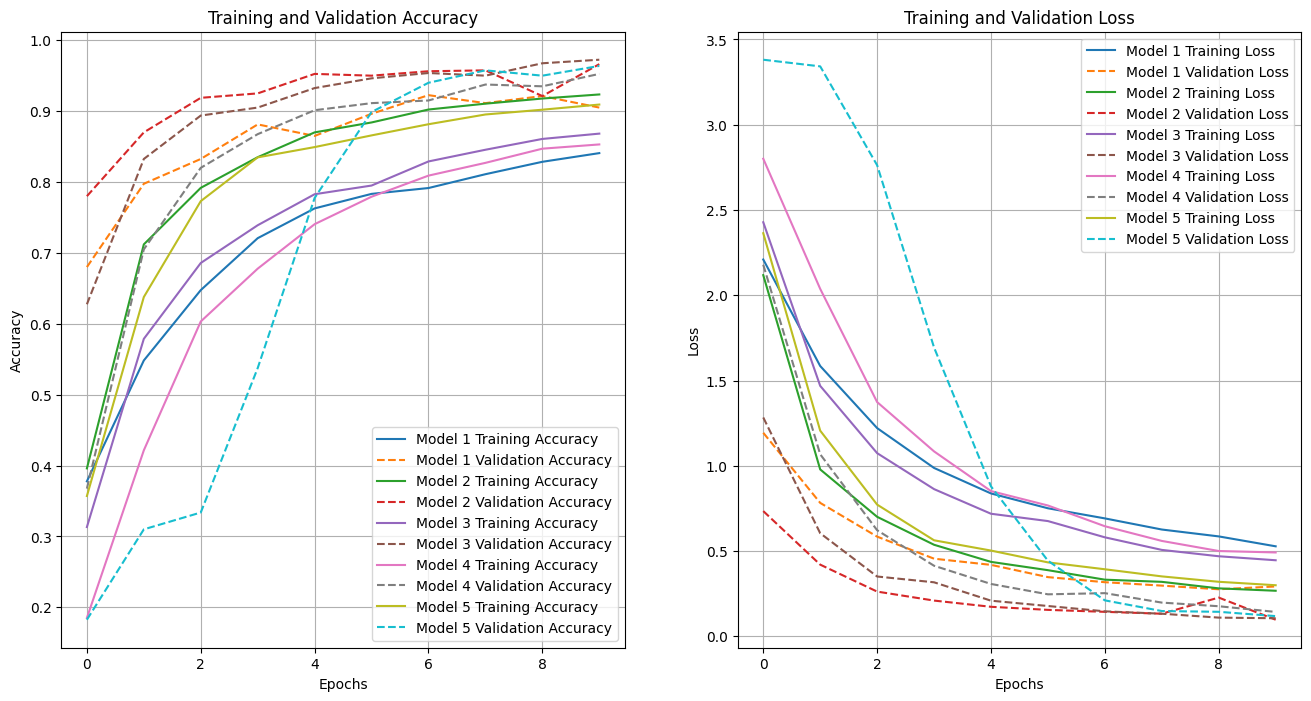

In [128]:
# Lấy accuracy và loss từ history của từng mô hình
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

# Tạo biểu đồ
epochs_range = range(EPOCHS_COUNT)

plt.figure(figsize=(16, 8))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Model 1 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc1, label='Model 1 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc2, label='Model 2 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc2, label='Model 2 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc3, label='Model 3 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc3, label='Model 3 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc4, label='Model 4 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc4, label='Model 4 Validation Accuracy', linestyle='--')

plt.plot(epochs_range, acc5, label='Model 5 Training Accuracy', linestyle='-')
plt.plot(epochs_range, val_acc5, label='Model 5 Validation Accuracy', linestyle='--')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Model 1 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss1, label='Model 1 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss2, label='Model 2 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss2, label='Model 2 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss3, label='Model 3 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss3, label='Model 3 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss4, label='Model 4 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss4, label='Model 4 Validation Loss', linestyle='--')

plt.plot(epochs_range, loss5, label='Model 5 Training Loss', linestyle='-')
plt.plot(epochs_range, val_loss5, label='Model 5 Validation Loss', linestyle='--')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.show()


In [129]:
test_loss, test_acc = model1.evaluate(test_x, test_y)
print("Model1")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model2.evaluate(test_x, test_y)
print("Model2")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model3.evaluate(test_x, test_y)
print("Model3")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model4.evaluate(test_x, test_y)
print("Model4")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')
test_loss, test_acc = model5.evaluate(test_x, test_y)
print("Model5")
print(f'Test accuracy: {test_acc:.3f}')
print(f'Test loss: {test_loss:.3f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9297 - loss: 0.1991 
Model1
Test accuracy: 0.940
Test loss: 0.196
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9540 - loss: 0.2110
Model2
Test accuracy: 0.965
Test loss: 0.173
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9540 - loss: 0.1661
Model3
Test accuracy: 0.965
Test loss: 0.142
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9510 - loss: 0.2193
Model4
Test accuracy: 0.960
Test loss: 0.189
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9564 - loss: 0.2425
Model5
Test accuracy: 0.965
Test loss: 0.182


In [130]:
from tensorflow.keras.models import Sequential

In [132]:
def create_model(optimizer="adam"):
    model = Sequential(
        [
            tf.keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=(28, 28, 1)
            ),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.BatchNormalization(),
            # tf.keras.layers.Dropout(0.50),
            tf.keras.layers.Dense(26, activation="softmax"),
        ]
    )
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
from sklearn.model_selection import GridSearchCV

results = []

for optimizer in param_grid['optimizer']:
    print(f'optimizer : {optimizer}')
    model = create_model(optimizer=optimizer)
    history = model.fit(train_x, train_y, epochs=10, batch_size=10, validation_data=(val_x, val_y))
    results.append((optimizer, history))
best_accuracy = 0
best_optimizer = None

for optimizer, history in results:
    accuracy = history.history['val_accuracy'][-1]
    print(f"Optimizer: {optimizer}, Validation Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_optimizer = optimizer

print(f"Best Optimizer: {best_optimizer}, Best Validation Accuracy: {best_accuracy}")


optimizer : SGD
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.3540 - loss: 2.4489 - val_accuracy: 0.5050 - val_loss: 1.8373
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7666 - loss: 0.8134 - val_accuracy: 0.8800 - val_loss: 0.4171
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8578 - loss: 0.4821 - val_accuracy: 0.9150 - val_loss: 0.2865
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8952 - loss: 0.3643 - val_accuracy: 0.9275 - val_loss: 0.2332
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9125 - loss: 0.3214 - val_accuracy: 0.9475 - val_loss: 0.2062
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9344 - loss: 0.2507 - val_accuracy: 0.9613 - val_loss: 0.1465
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9409 - loss: 0.2148 - val_accuracy: 0.9438 - val_loss: 0.2087
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9443 - loss: 

In [134]:
def create_model(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07):
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon,
        name="Adamax",
    )
    model = Sequential(
        [
            tf.keras.layers.Conv2D(
                32, (3, 3), activation="relu", input_shape=(28, 28, 1)
            ),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.BatchNormalization(),
            # tf.keras.layers.Dropout(0.50),
            tf.keras.layers.Dense(26, activation="softmax"),
        ]
    )
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [135]:
# Tạo danh sách các giá trị tham số từ param_grid
learning_rates = [0.0001, 0.0005]
beta_1_values = [0.8, 0.9]
beta_2_values = [0.99, 0.999]
epsilons = [1e-07]

results_ = []
total_configs = len(learning_rates) * len(beta_1_values) * len(beta_2_values) * len(epsilons)
config_count = 0

In [136]:
for learning_rate in learning_rates:
    for beta_1 in beta_1_values:
        for beta_2 in beta_2_values:
            for epsilon in epsilons:
                config_count += 1
                print(f"Processing configuration {config_count}/{total_configs}...")

                model = create_model(learning_rate,beta_1,beta_2,epsilon)
                history_ = model.fit(train_x, train_y, epochs=10, batch_size=10, validation_data=(val_x, val_y))
                param = {
                        'learning_rate': learning_rate,
                        'beta_1': beta_1,
                        'beta_2': beta_2,
                        'epsilon': epsilon
                    }
                results_.append((history_,param))


Processing configuration 1/8...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.1688 - loss: 3.0543 - val_accuracy: 0.1175 - val_loss: 2.8358
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6055 - loss: 1.4280 - val_accuracy: 0.7975 - val_loss: 0.7120
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7706 - loss: 0.8555 - val_accuracy: 0.8700 - val_loss: 0.4406
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8318 - loss: 0.6297 - val_accuracy: 0.9025 - val_loss: 0.3206
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8659 - loss: 0.4745 - val_accuracy: 0.9200 - val_loss: 0.2676
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8975 - loss: 0.3634 - val_accuracy: 0.9350 - val_loss: 0.2108
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9154 - loss: 0.2992 - val_accuracy: 0.9450 - val_loss: 0.1802
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - ac

In [137]:
best_score = -np.inf
best_params = {}
for history,param in results_:
    accuracy = history.history['val_accuracy'][-1]
    print(f"Params = {param} : {accuracy}")
    if accuracy > best_score:
        best_score = accuracy
        best_params = param
# In ra tham số tốt nhất và điểm số tương ứng
print("Best parameters:", best_params)
print("Best score:", best_score)

Params = {'learning_rate': 0.0001, 'beta_1': 0.8, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.9474999904632568
Params = {'learning_rate': 0.0001, 'beta_1': 0.8, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9449999928474426
Params = {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.9487500190734863
Params = {'learning_rate': 0.0001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9462500214576721
Params = {'learning_rate': 0.0005, 'beta_1': 0.8, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.9574999809265137
Params = {'learning_rate': 0.0005, 'beta_1': 0.8, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9524999856948853
Params = {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.99, 'epsilon': 1e-07} : 0.96875
Params = {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07} : 0.9537500143051147
Best parameters: {'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.99, 'epsilon': 1e-07}
Best score: 0.96875
